In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('train_1D.csv')
test_df = pd.read_csv('test_1D.csv')

In [3]:
train_df = train_df[:1000]
test_df = test_df[:1000]

In [6]:
X_train = train_df.drop(columns=['x-midplane','y-midplane']).values
X_test = test_df.drop(columns=['x-midplane','y-midplane']).values

y_train = train_df[['x-midplane','y-midplane']].values
y_test = test_df[['x-midplane','y-midplane']].values

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [8]:
X_train.shape

(1000, 34)

In [16]:
model = Sequential()
model.add(Dense(16, input_shape=(34,), activation='linear')) # Add an input shape! (features,)
model.add(Dense(2, activation='linear'))
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                560       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 34        
Total params: 594
Trainable params: 594
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [19]:
history = model.fit(X_train,
                    y_train,
                    epochs=80, 
                    batch_size=64,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

W0930 13:12:16.099720 139929697748800 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0930 13:12:16.190858 139929697748800 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 800 samples, validate on 200 samples
Epoch 1/80
800/800 [==============================] - 1s 853us/step - loss: 1013.8382 - mean_squared_error: 1013.8382 - val_loss: 978.9954 - val_mean_squared_error: 978.9954
Epoch 2/80
800/800 [==============================] - 0s 18us/step - loss: 1003.0983 - mean_squared_error: 1003.0983 - val_loss: 970.3498 - val_mean_squared_error: 970.3498
Epoch 3/80
800/800 [==============================] - 0s 16us/step - loss: 992.8928 - mean_squared_error: 992.8928 - val_loss: 961.6369 - val_mean_squared_error: 961.6369
Epoch 4/80
800/800 [==============================] - 0s 17us/step - loss: 982.1672 - mean_squared_error: 982.1672 - val_loss: 953.0840 - val_mean_squared_error: 953.0840
Epoch 5/80
800/800 [==============================] - 0s 16us/step - loss: 971.7077 - mean_squared_error: 971.7077 - val_loss: 944.1413 - val_mean_squared_error: 944.1413
Epoch 6/80
800/800 [==============================] - 0s 16us/step - loss: 960.8766 - mean_squ

800/800 [==============================] - 0s 16us/step - loss: 397.2207 - mean_squared_error: 397.2207 - val_loss: 421.9106 - val_mean_squared_error: 421.9106
Epoch 49/80
800/800 [==============================] - 0s 17us/step - loss: 392.9949 - mean_squared_error: 392.9949 - val_loss: 419.4233 - val_mean_squared_error: 419.4233
Epoch 50/80
800/800 [==============================] - 0s 15us/step - loss: 389.1540 - mean_squared_error: 389.1540 - val_loss: 417.6839 - val_mean_squared_error: 417.6839
Epoch 51/80
800/800 [==============================] - 0s 15us/step - loss: 386.2135 - mean_squared_error: 386.2135 - val_loss: 415.1490 - val_mean_squared_error: 415.1490
Epoch 52/80
800/800 [==============================] - 0s 15us/step - loss: 382.1207 - mean_squared_error: 382.1207 - val_loss: 414.1291 - val_mean_squared_error: 414.1291
Epoch 53/80
800/800 [==============================] - 0s 15us/step - loss: 378.9431 - mean_squared_error: 378.9431 - val_loss: 413.7347 - val_mean_squa

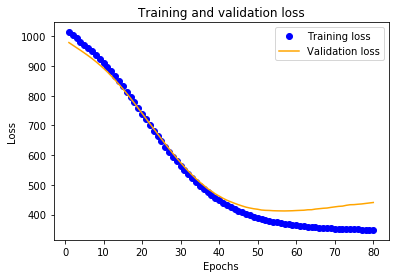

In [20]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('/home/jieun201/fullprecision400e_yprofile/loss.png')

In [21]:
p_test = model.predict(X_test)

In [22]:
residuals = np.subtract(p_test,y_test)

Text(0.5, 0, 'X residuals [um]')

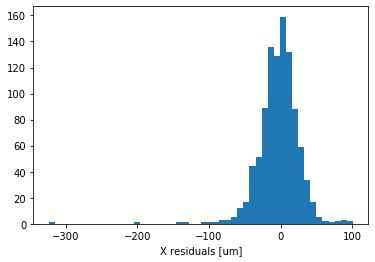

In [26]:
# X coordinate
plt.hist(residuals[:,0],bins=50)
plt.xlabel('X residuals [um]')

Text(0.5, 0, 'Y residuals [um]')

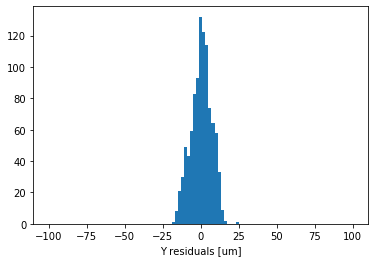

In [27]:
# Y coordinate
plt.hist(residuals[:,1],bins=np.linspace(-100,100,100))
plt.xlabel('Y residuals [um]')